<div style="background-color: #FFEE77; padding: 10px;">
    


# **Predicting Airline Passenger Satisfaction: A Machine Learning Approach to Improve Service Quality**


<div style="background-color: #ccf2ff; padding: 10px;">

## 🔒 **Problem Statement**

This dataset captures the results of an airline Passenger Satisfaction survey. It includes various factors that may influence the overall travel experience, such as demographics, flight-related details, and other key factors. The goal is to identify which factors have the greatest impact on Passenger Satisfaction, helping us better understand the drivers of Satisfaction and Dissatisfaction.

![Airline Image](airline.png)

<div style="background-color: #ccf2ff; padding: 10px;">

## 🎯 **Business Objective**


The goal of this project is to develop a predictive model that accurately predicts Passenger Satisfaction levels based on the available features in the data. By analyzing the relationships between these features and overall Passenger Satisfaction, the model will help identify key drivers of both Satisfaction and Dissatisfaction.

This insight can enable airlines to improve the overall passenger experience by focusing on the factors that have the greatest impact on customer satisfaction, ultimately leading to better service quality and higher customer retention.

![Customer Satisfaction GIF](Satisfaction_gif.gif)


<div style="background-color: #ccf2ff; padding: 10px;">

    
#  **Feature Descriptions**

- **Gender**: Gender of the passengers (Female, Male)
- **Customer Type**: The type of customer (Loyal customer, Disloyal customer)
- **Age**: Age of the passengers
- **Type of Travel**: The purpose of the flight (Personal Travel, Business Travel)
- **Class**: Travel class in the plane (Business, Eco, Eco Plus)
- **Flight Distance**: The distance covered in the journey
- **Inflight Wifi Service**: Satisfaction level of the inflight wifi service (0: Not Applicable, 1-5)
- **Departure/Arrival Time Convenient**: Satisfaction level of Departure/Arrival time convenience
- **Ease of Online Booking**: Satisfaction level of online booking
- **Gate Location**: Satisfaction level of Gate location
- **Food and Drink**: Satisfaction level of Food and drink
- **Online Boarding**: Satisfaction level of online boarding
- **Seat Comfort**: Satisfaction level of Seat comfort
- **Inflight Entertainment**: Satisfaction level of inflight entertainment
- **On-board Service**: Satisfaction level of On-board service
- **Leg Room Service**: Satisfaction level of Leg room service
- **Baggage Handling**: Satisfaction level of baggage handling
- **Check-in Service**: Satisfaction level of Check-in service
- **Inflight Service**: Satisfaction level of inflight service
- **Cleanliness**: Satisfaction level of Cleanliness
- **Departure Delay in Minutes**: Minutes delayed at departure
- **Arrival Delay in Minutes**: Minutes delayed at arrival
- **Satisfaction**: Airline satisfaction level (Satisfaction, neutral, or dissatisfaction)

# Importing Libraries 

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import random

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder,PowerTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import roc_auc_score,roc_curve,cohen_kappa_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier,XGBRegressor
import xgboost as xgb


from warnings import filterwarnings
filterwarnings('ignore')

import pickle

# Data Exploration 🔍

In [58]:
traindata = pd.read_csv("train.csv")
testdata = pd.read_csv("test.csv")

In [59]:
traindata.head(3)

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  

[3 rows x 25 columns]

In [60]:
traindata.drop(columns=["Unnamed: 0", "id"],inplace=True)
testdata.drop(columns=["Unnamed: 0", "id"],inplace=True)

In [61]:
traindata.shape

(103904, 23)

In [62]:
testdata.shape

(25976, 23)

## Visualisation 📈

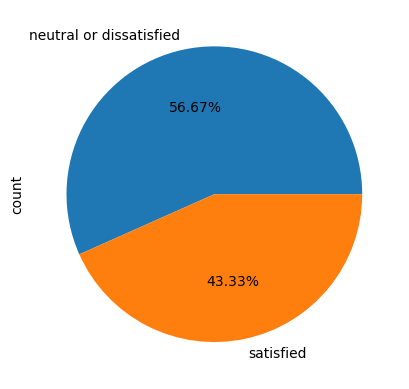

In [64]:
traindata["satisfaction"].value_counts().plot(kind = "pie", autopct = "%.2f%%")
plt.show()

<div style="background-color: #ffff99; padding: 10px;">
    
* From the above chart we can say that **43.33%** passengers are satisfied whereas **56.67%** passengers are dissatified. This also depicts that our dataset is balanced.

In [66]:
traindata.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [67]:
traindata.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [68]:
num_cols = ["Age", "Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes"]
            
cat_cols = ["Gender","Customer Type","Type of Travel", "Class","Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
           "Gate location","Food and drink","Online boarding","Inflight entertainment",
           "On-board service","Seat comfort", "Leg room service","Baggage handling","Checkin service","Inflight service","Cleanliness","satisfaction"]

### Univariate Analysis

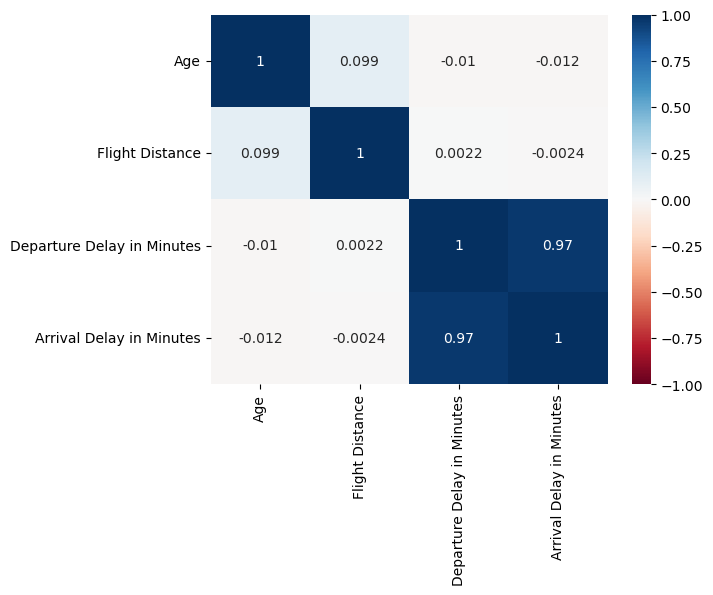

In [70]:
# Analysing number cols by correlation matrix

sns.heatmap(traindata[num_cols].corr(),annot = True, vmax =1,vmin = -1,cmap = "RdBu")
plt.show()

<div style="background-color: #ffff99; padding: 10px;">
    
### **Inferences from Correlation Matrix:**


- There is strong positive correlation between Arrival Delay and Departure delay, which means if there is delay in departure it's highly chance tha     t the arrival will also be delayed.
- The other variables like age and flight distance shows very weak correlations with delays.
- There is no strong negative correlation between the variables.

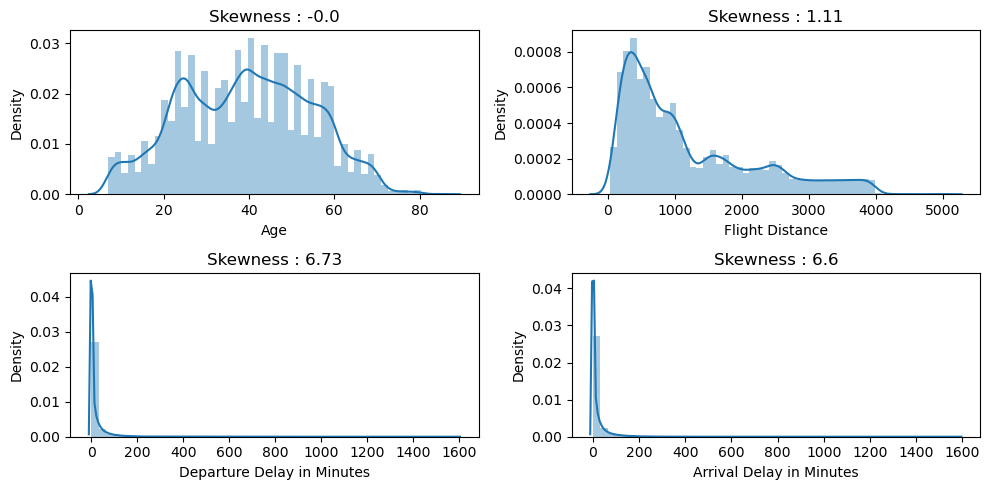

In [72]:
# Analysing number cols by distplot

t=1
plt.figure(figsize=(10,5))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(traindata[i])
    plt.title(f'Skewness : {round(traindata[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

<div style="background-color: #ffff99; padding: 10px;">
    
### **Inferences from Displot**:

- As per the age distribution graph the data is evenly distributed.
- The Flight distance graph is positively skewed this means most flights have shorter distances, but there are some flights with significantly longer   distances.
- Departure Delay in minutes and Arrival Delay in minutes both graphs are similar in nature indicating that most flights are on time but there are few flights having very long delays in each category.

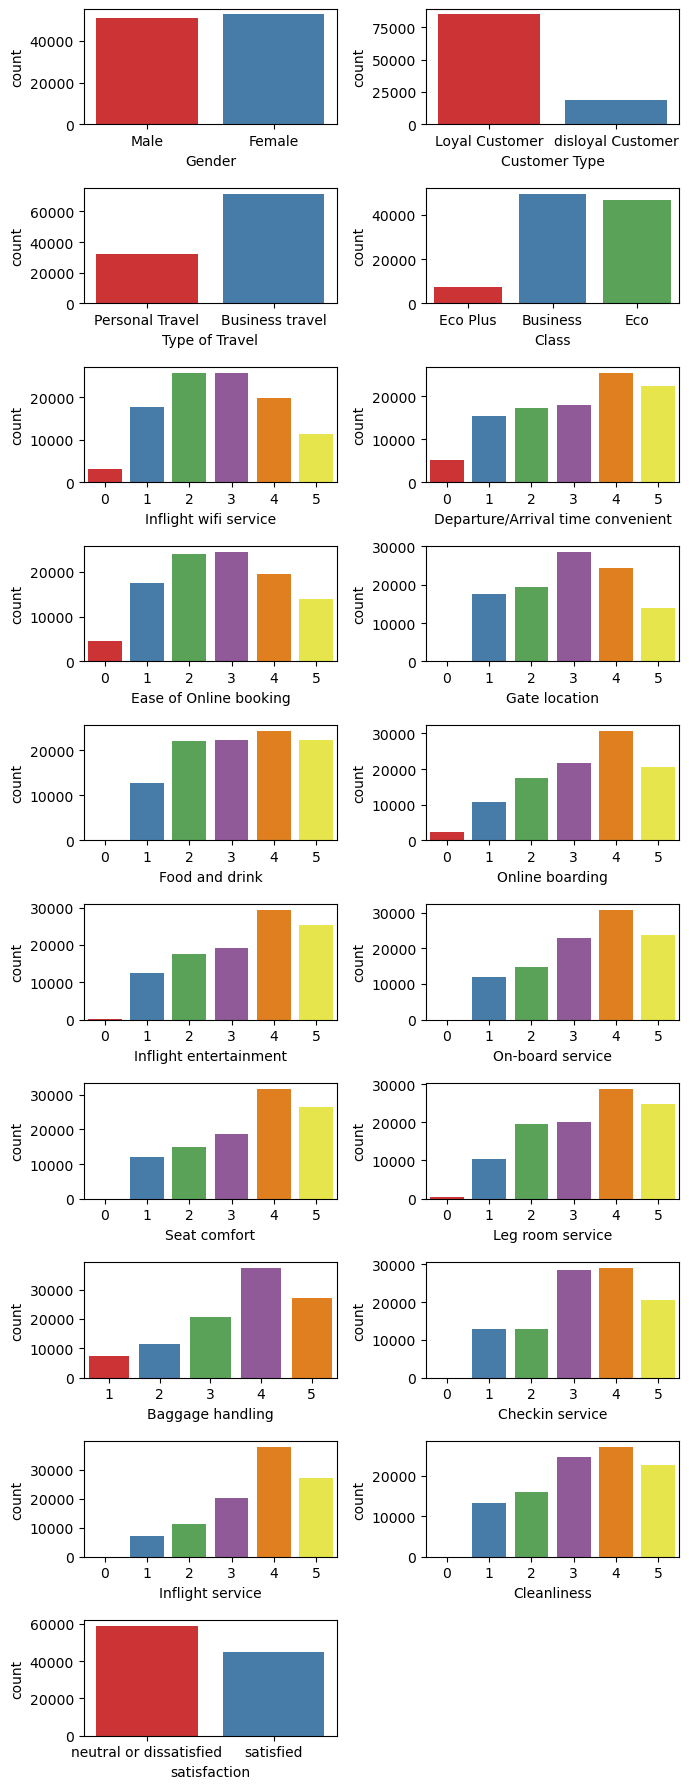

In [74]:
# Analysing category cols by count plot

t = 1
plt.figure(figsize=(7, 18))
for i in cat_cols:
    plt.subplot(10, 2, t)
    sns.countplot(data=traindata, x=i, palette='Set1')  
    t += 1
plt.tight_layout()
plt.show()

In [75]:
len(cat_cols)

19

<div style="background-color: #ffff99; padding: 10px;">
    
### **Inferences from all category cols**:

- The number of female Passengers is slightly higher than the male Passengers.
- Loyal Customers are significantly higher than the Disloyal Customers.
- Business Travellers are higher than the Personal Travellers.
- Business Class have higher Passengers than Eco and Ecoplus.
- Most of Passengers are not Satisfied from Wifi Sevices.
- Most of Passengers are Satisfied with Departure and Arrival Time.


### Bivariate Analysis

<Figure size 700x300 with 0 Axes>

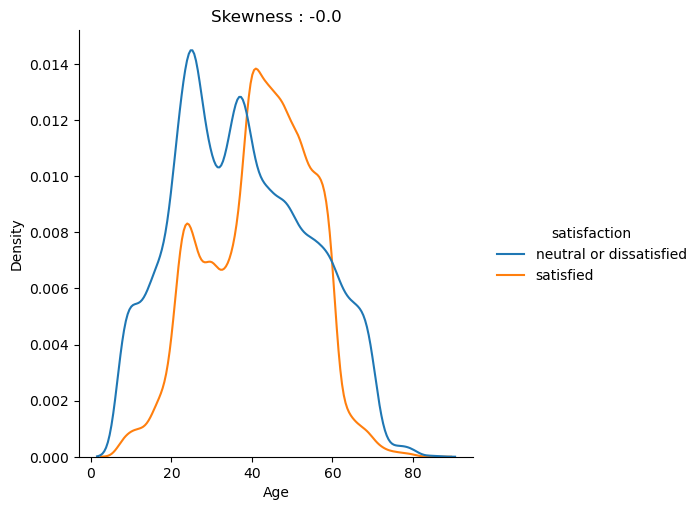

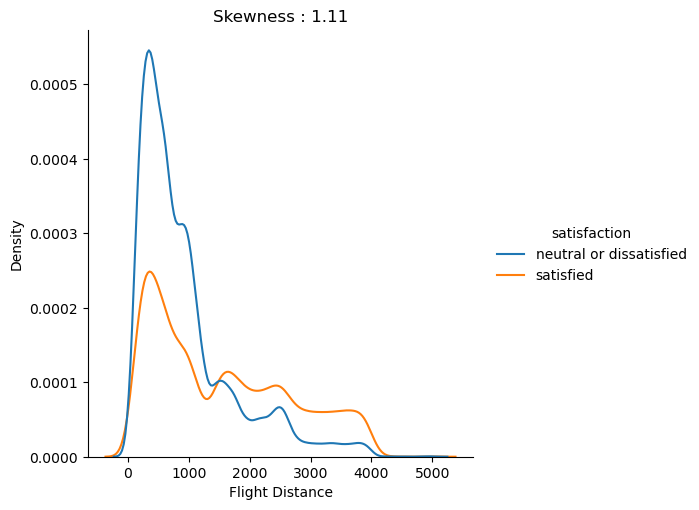

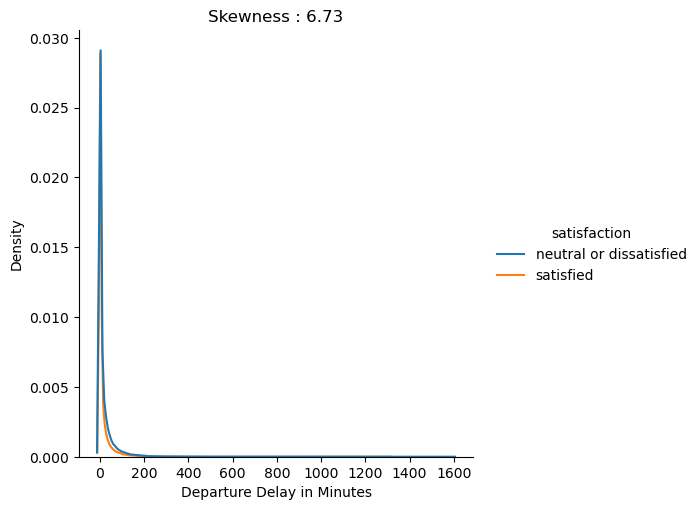

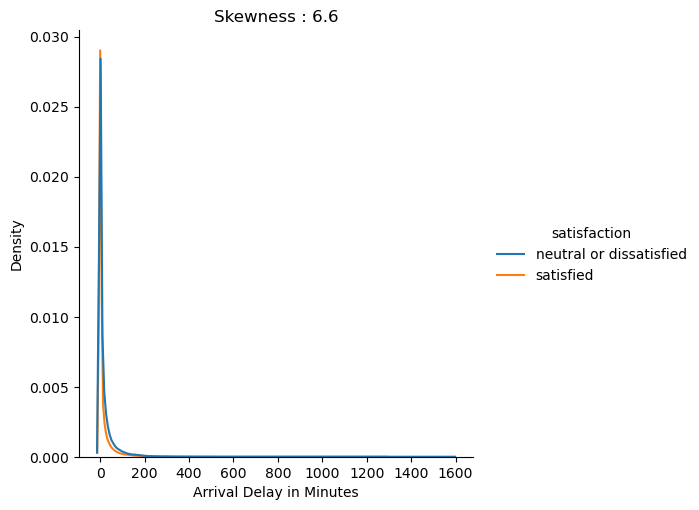

In [78]:
# Num vs Target through displot

plt.figure(figsize=(7,3))
for i in num_cols:
    sns.displot(data = traindata,x=i,kind='kde',hue='satisfaction')
    plt.title(f'Skewness : {round(traindata[i].skew(),2)}')
plt.show()

<div style="background-color: #ffff99; padding: 10px;">
    
### **Inferences from displot**:

- The age distribution is symmetric indicating a balanced spread of ages.
- Most of the passengers are around 40 years old.
- Short distance flights have more Dissatisfied customers as compared to long distance flights.
- As flight distance increases number of Satisfied customers also increases.
- Departure delay does not appear to be a strong predictor of Customer Satisfaction as both Satisfied and Dissatisfied passengers show similar trends with respect to delays.
- Short arrival delays have slightly higher Satisfied Customers than Dissatisfied Customers.

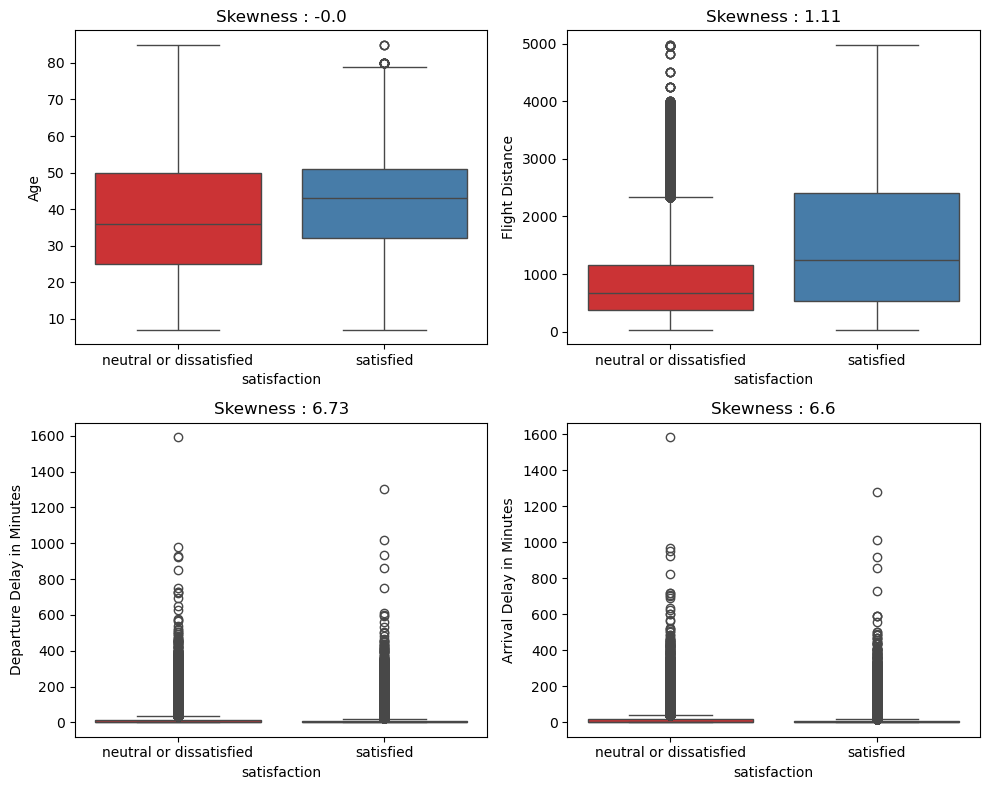

In [80]:
# Num vs Target through box plot

t=1
plt.figure(figsize=(10,8))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data = traindata,x='satisfaction',y=i,palette = "Set1")
    plt.title(f'Skewness : {round(traindata[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

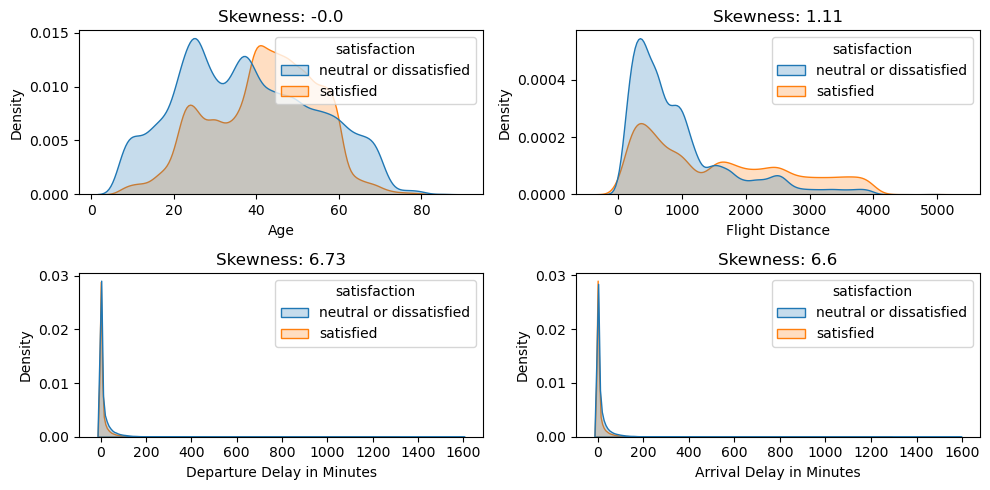

In [81]:
# Num vs Target through kde plot

t = 1
plt.figure(figsize=(10, 5))
for i in num_cols:
    plt.subplot(2, 2, t)
    sns.kdeplot(data = traindata, x = i, hue = "satisfaction", fill = True)
    plt.title(f'Skewness: {round(traindata[i].skew(), 2)}')
    t += 1
plt.tight_layout()
plt.show()

<div style="background-color: #ffff99; padding: 10px;">
    
### **Inferences from the plots showing the relationship between all number cols with the target column**:

- The distribution of ages for both Dissatisfied and Satisfied Passengers is almost similar. The median age for Satisfied Passengers is slightly higher.
- Age does not show any significant difference between Satisfaction and Dissatisfaction of Passengers.
- Satisfied Passengers tend to have longer flight distances.

In [83]:
traindata.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

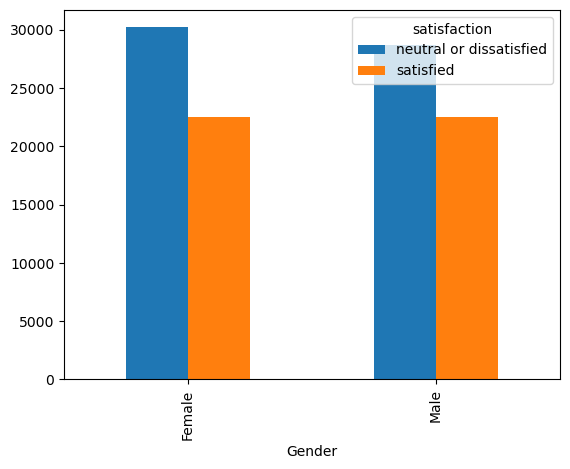

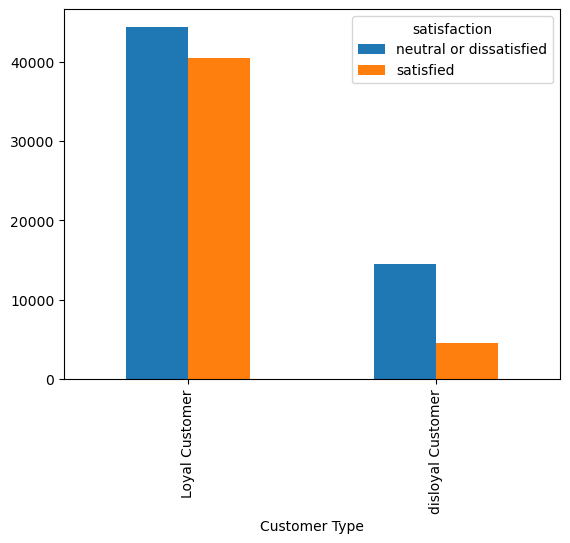

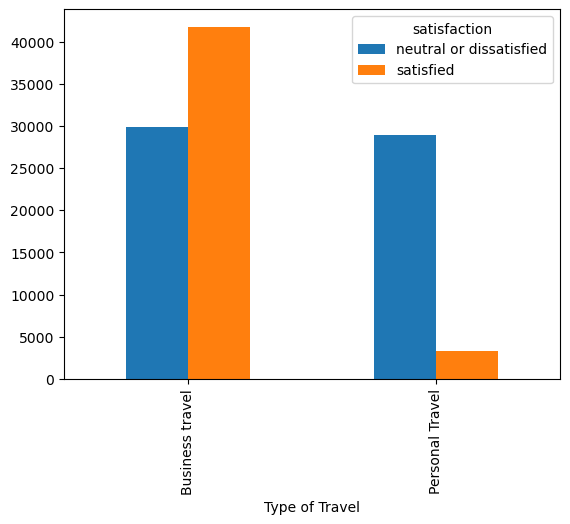

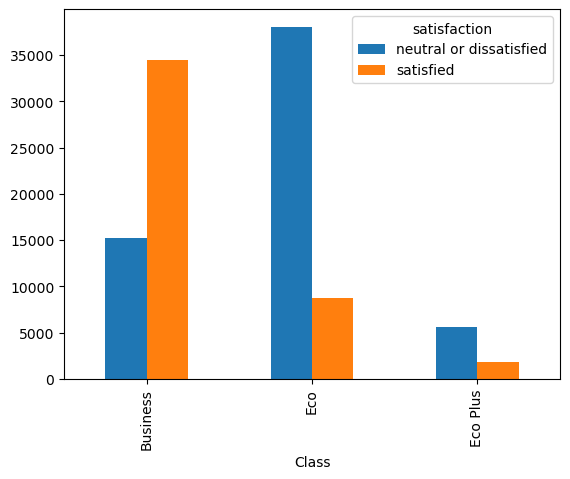

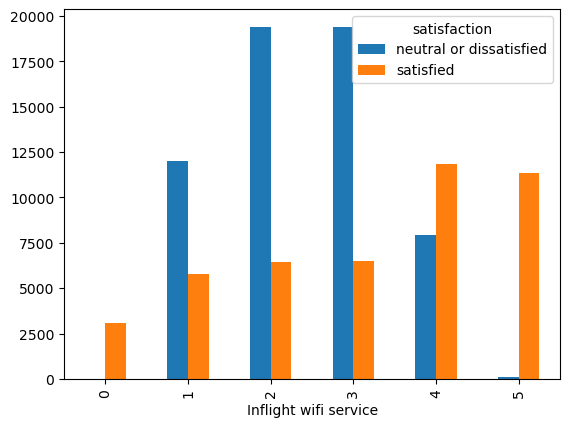

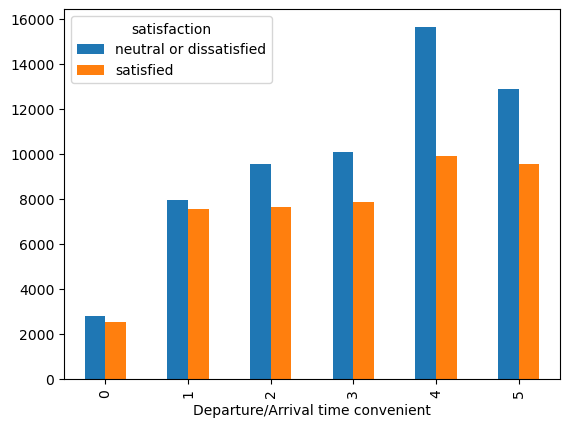

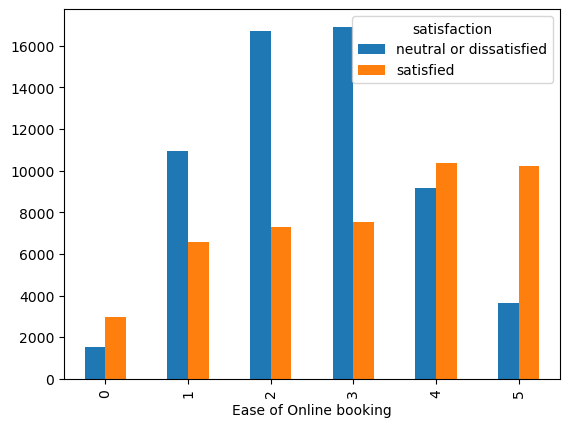

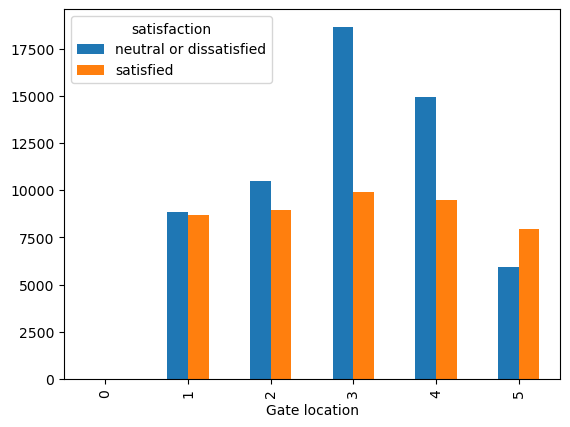

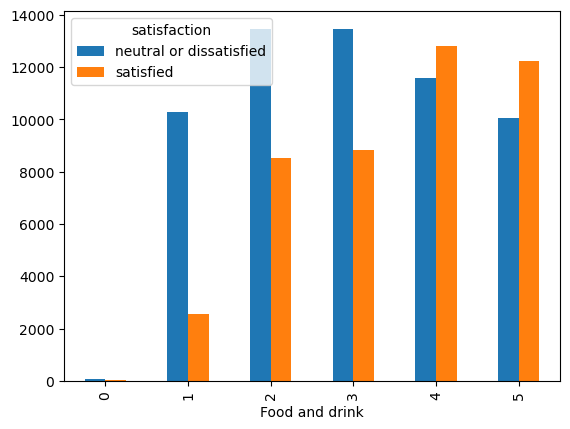

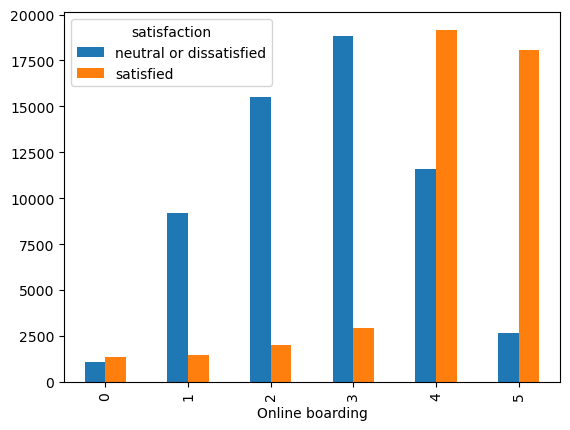

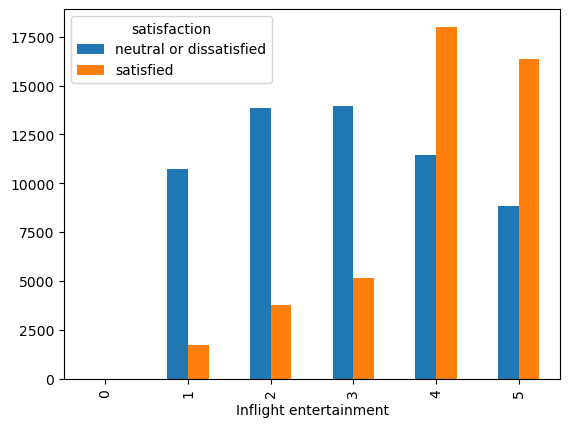

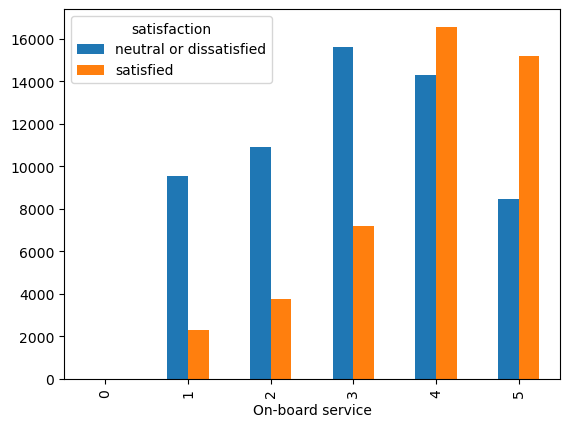

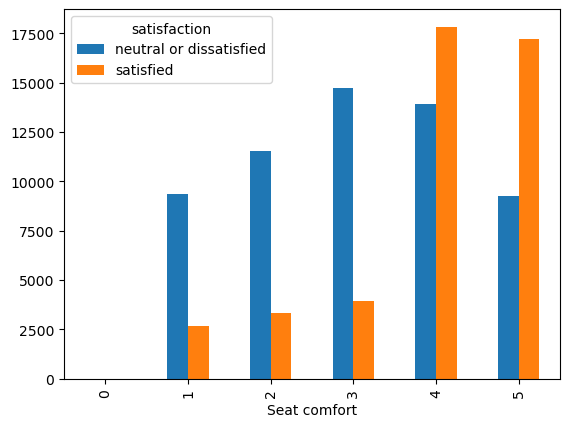

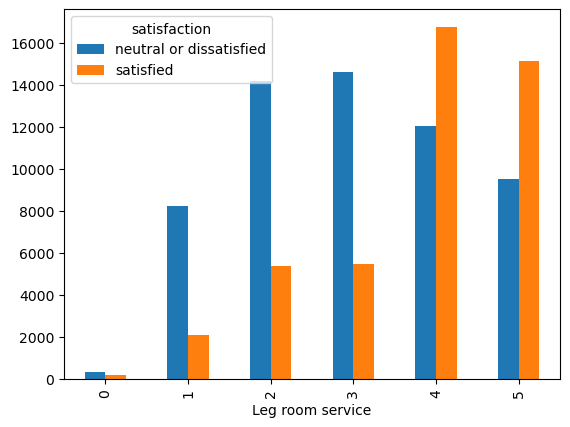

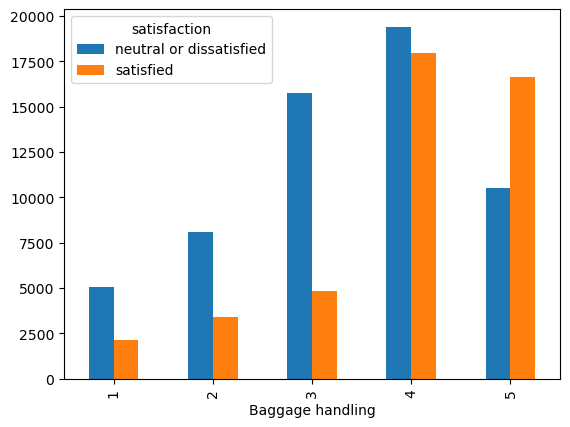

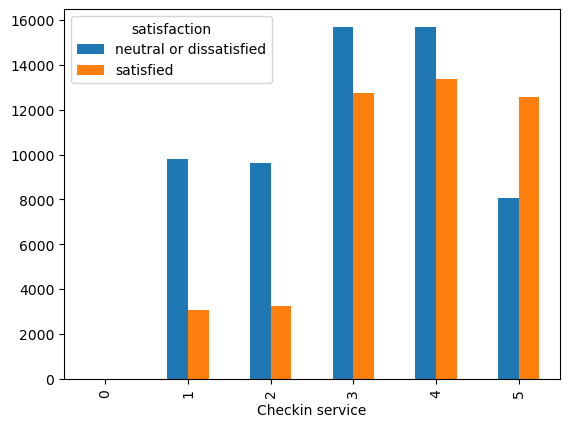

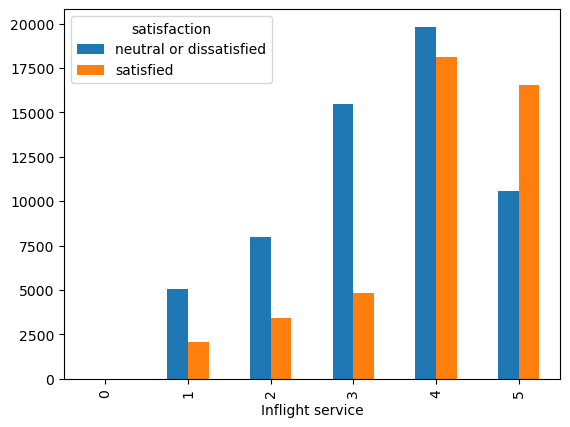

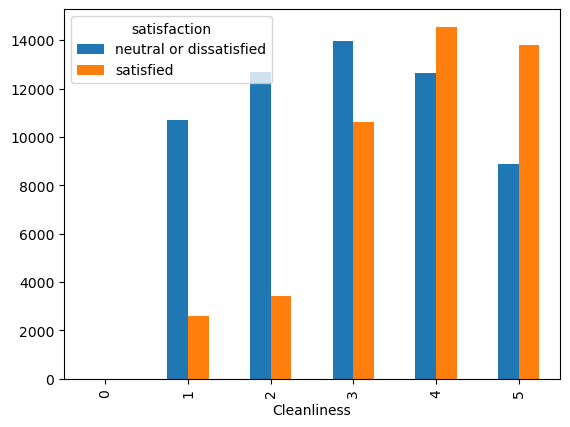

In [84]:
# cat vs cat

for i in cat_cols:
    if i != 'satisfaction':
        pd.crosstab(index=traindata[i],columns=traindata['satisfaction']).plot(kind='bar')
plt.show()

<div style="background-color: #ffff99; padding: 10px;">

### **Inferences for all the categorical columns:**

**Gender**: Satisfaction levels between male and female Passengers are similar, indicating that Gender does not significantly impact Passenger Satisfaction.

**Customer Loyalty**: Disloyal Customers experience significantly lower Satisfaction levels compared to Loyal Customers. This highlights the importance of addressing the issues faced by Disloyal Customers to improve their overall Satisfaction.

**Travel Purpose**: Dissatisfied customers are more prevalent among Personal Travelers, who generally report lower Satisfaction levels compared to Business Travelers. Improving the experience for Personal Travelers may help in retaining them.

**Class of Service**: Dissatisfied customers are more likely to be found in Eco and Eco Plus classes, where Satisfaction levels are lower compared to Business class.

**Convenience of Departure/Arrival Times**: While convenient departure/arrival times matter they are not strong predictor of Customer Satisfaction because Dissatisfaction remains high even when convenience is rated highly.

**Inflight Wi-Fi Services**: As the inflight wifi services rating increases the number of Satisfied Passengers also increases significantly. Lower ratings have more Dissatisfaction levels.

**Ease of Online Booking**: As the ease of online booking rating increases the number of Satisfied Passengers also increases.

These inferences point out specific areas where targeted improvements can be made to address Passengers Dissatisfaction and increase their Satisfaction.

## Inferential Statistics

<div style="background-color: #ffff99; padding: 10px;">
    

### 🔍 **Key Insights from Exploratory Data Analysis**:

- **Type of Travel, Class, Inflight WiFi Service**, and **Ease of Online Booking** emerged as strong predictors of Passenger Satisfaction, as indicated by the exploratory analysis.
- **Gender** does not have a significant influence on Passenger Satisfaction.
- **Age** was also found to be an insignificant factor in predicting Passenger Satisfaction.

Since we identified **Type of Travel** and **Class** as key factors influencing passenger Satisfaction, we will proceed with **Hypothesis Testing** to validate these findings. As all relevant columns are categorical, we will perform a **Chi-Square Test for Independence** to assess the statistical dependency of these features on Passenger Satisfaction.

In [88]:
#Ho: Variables are independent
#H1: Variables are dependent

observed_table = pd.crosstab(traindata['Type of Travel'], traindata['satisfaction'])
chi_stat, p_value, df, expected = stats.chi2_contingency(observed_table)

alpha = 0.05

if p_value < alpha:
     print("Reject Ho: Type of Travel and Satisfaction are dependent")
    
else:
    print("Fail to Reject Ho: Type of Travel and Satisfaction is independent")

Reject Ho: Type of Travel and Satisfaction are dependent


In [89]:
#Ho: Variables are independent
#Ha: Variables are dependent

observed_table = pd.crosstab(traindata["Class"], traindata["satisfaction"])
chi_stat, p_value, df, expected = stats.chi2_contingency(observed_table)


alpha = 0.05

if p_value < alpha:
    print("Reject Ho: Class and Satisfaction is dependent of each other")
else:
    print("Fail to Reject Ho: Class and Satisfaction is independent")

Reject Ho: Class and Satisfaction is dependent of each other


<div style="background-color: #ffff99; padding: 10px;">

### **Based on the Chi-Square tests conducted for both Type of Travel and Class**:

- Type of Travel and Passenger Satisfaction are dependent, as we reject the null hypothesis (p-value < 0.05).

- Similarly, Class and Passenger Satisfaction are also dependent, as we reject the null hypothesis (p-value < 0.05).


**Confidence Level**:

We used an alpha value of 0.05, which indicates a 95% confidence level. This means we are 95% confident that the relationship observed between these variables (Type of Travel, Class, and Satisfaction) is statistically significant and not due to random chance.

This confirms that Type of Travel and Class are important factors influencing Passenger Satisfaction.

## Finding Defects 🚨

In [92]:
# Missing values in train data

traindata.isnull().sum().sum()

310

In [93]:
# Missing values in test data

testdata.isnull().sum().sum()

83

In [94]:
# Duplicate values in train data

traindata[traindata.duplicated()]

Empty DataFrame
Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
Index: []

[0 rows x 23 columns]

In [95]:
# Duplicate values in test data

testdata[testdata.duplicated()]

Empty DataFrame
Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
Index: []

[0 rows x 23 columns]

<div style="background-color: #ffff99; padding: 10px;">
    
**There is no duplicates in the dataset.**

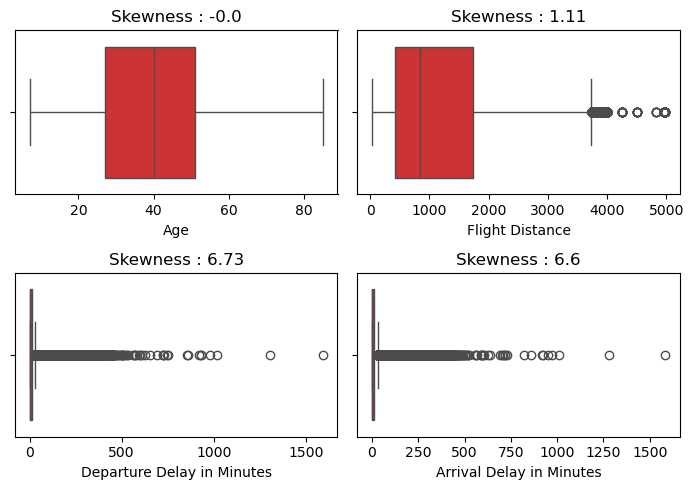

In [97]:
# Checking for outliers in the dataset

t=1
plt.figure(figsize=(7,5))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=traindata,x=i, palette = "Set1")
    plt.title(f'Skewness : {round(traindata[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

<div style="background-color: #ffff99; padding: 10px;">
    
**There are extreme outliers in the Arrival Delay in minutes and Departure delay in minutes.**

# Data Preprocessing ✨

## Treating the Defects 

In [101]:
# Treating missing values in train data

traindata.dropna(inplace = True)

In [102]:
# Treating missing values in test data

testdata.dropna(inplace = True)

In [103]:
# Treating outliers

for i in num_cols:
    q3,q1 = np.percentile(traindata[i],[75,25])
    iqr = q3-q1
    ul,ll  = q3+1.5*iqr, q1-1.5*iqr
    traindata[i] = traindata[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

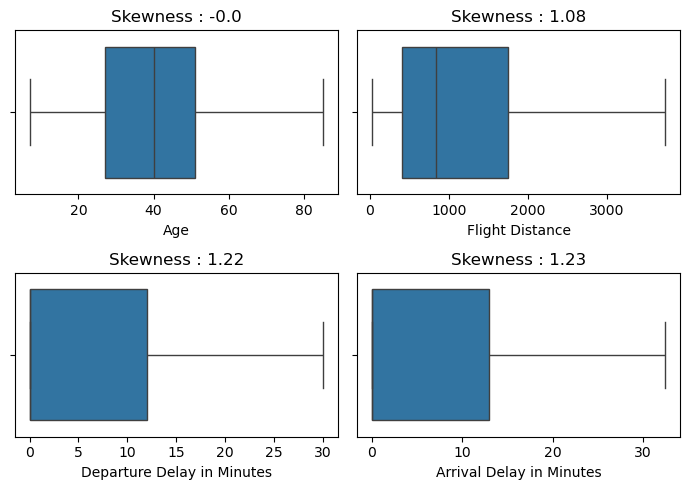

In [104]:
# No outliers

t=1
plt.figure(figsize=(7,5))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=traindata,x=i)
    plt.title(f'Skewness : {round(traindata[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

<div style="background-color: #ffff99; padding: 10px;">

**The outliers are treated as we can see in the above box plot, now there is no outliers in the dataset.**

## Encoding Categorical Variables 🔡

In [107]:
traindata[cat_cols]

Gender      Customer Type   Type of Travel     Class  \
0         Male     Loyal Customer  Personal Travel  Eco Plus   
1         Male  disloyal Customer  Business travel  Business   
2       Female     Loyal Customer  Business travel  Business   
3       Female     Loyal Customer  Business travel  Business   
4         Male     Loyal Customer  Business travel  Business   
...        ...                ...              ...       ...   
103899  Female  disloyal Customer  Business travel       Eco   
103900    Male     Loyal Customer  Business travel  Business   
103901    Male  disloyal Customer  Business travel  Business   
103902  Female  disloyal Customer  Business travel       Eco   
103903    Male     Loyal Customer  Business travel  Business   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  Food and drink  \
0                            3              1               5   
1                            3              3               1   
2                            2              2               5   
3                            5              5               2   
4                            3              3               4   
...                        ...            ...             ...   
103899                       2              3               2   
103900                       4              4               2   
103901                       1              3               4   
103902                       1              5               1   
103903                       3              3               1   

        Online boarding  Inflight entertainment  On-board service  \
0                     3                       5                 4   
1                     3                       1                 1   
2                     5                       5                 4   
3                     2                       2                 2   
4                     5                       3                 3   
...                 ...                     ...               ...   
103899                2                       2                 3   
103900                4                       5                 5   
103901                1                       4                 3   
103902                1                       1                 4   
103903                1                       1                 1   

        Seat comfort  Leg room service  Baggage handling  Checkin service  \
0                  5                 3                 4                4   
1                  1                 5                 3                1   
2                  5                 3                 4                4   
3                  2                 5                 3                1   
4                  5                 4                 4                3   
...              ...               ...               ...              ...   
103899             2                 1                 4                2   
103900             5                 5                 5                5   
103901             5                 2                 4                5   
103902             1                 5    

In [108]:
for i in cat_cols:
    print(f'The number of categories in {i} is = {len(traindata[i].unique())}')
    print(traindata[i].value_counts())
    print()

The number of categories in Gender is = 2
Gender
Female    52576
Male      51018
Name: count, dtype: int64

The number of categories in Customer Type is = 2
Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64

The number of categories in Type of Travel is = 2
Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

The number of categories in Class is = 3
Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

The number of categories in Inflight wifi service is = 6
Inflight wifi service
3    25789
2    25755
4    19737
1    17781
5    11436
0     3096
Name: count, dtype: int64

The number of categories in Departure/Arrival time convenient is = 6
Departure/Arrival time convenient
4    25474
5    22333
3    17903
2    17142
1    15452
0     5290
Name: count, dtype: int64

The number of categories in Ease of Online booking is = 6
Ease of Online booking
3    24370
2    23962
4    19

In [109]:
# Encoding Target variable in Train data

traindata['satisfaction']=traindata['satisfaction'].map({'neutral or dissatisfied':1,'satisfied':0})



# Encoding all other features in Train data

traindata=pd.get_dummies(traindata,drop_first=True,dtype=int)

In [110]:
# Encoding Target variable in Test data

testdata['satisfaction']=testdata['satisfaction'].map({'neutral or dissatisfied':1,'satisfied':0})



# Encoding all other features in Test data

testdata=pd.get_dummies(testdata,drop_first=True,dtype=int)

In [111]:
traindata

Age  Flight Distance  Inflight wifi service  \
0        13            460.0                      3   
1        25            235.0                      3   
2        26           1142.0                      2   
3        25            562.0                      2   
4        61            214.0                      3   
...     ...              ...                    ...   
103899   23            192.0                      2   
103900   49           2347.0                      4   
103901   30           1995.0                      1   
103902   22           1000.0                      1   
103903   27           1723.0                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
2                   2               5                5             5   
3                   5               2                2             2   
4                   3               4                5             5   
...               ...             ...              ...           ...   
103899              3               2                2             2   
103900              4               2                4             5   
103901              3               4                1             5   
103902              5               1                1             1   
103903              3               1                1             1   

        Inflight entertainment  ...  Inflight service  Cleanliness  \
0                            5  ...                 5            5   
1                            1  ...                 4            1   
2                            5  ...                 4            5   
3                            2  ...                 4            2   
4                            3  ...                 3            3   
...                        ...  ...               ...          ...   
103899                       2  ...                 3            2   
103900                       5  ...                 5            4   
103901                       4  ...                 5            4   
103902                       1  ...                 4            1   
103903                       1  ...                 3            1   

        Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                             25.0                      18.0             1   
1                              1.0                       6.0             1   
2                              0.0                       0.0             0   
3                             11.0                       9.0             1   
4                              0.0                       0.0             0   
...                            ...                       ...           ...   
103899                         3.0                       0.0             1   
103900                         0.0                       0.0             0   
103901                         7.0                      14.0             1   
103902                         0

In [112]:
testdata

Age  Flight Distance  Inflight wifi service  \
0       52              160                      5   
1       36             2863                      1   
2       20              192                      2   
3       44             3377                      0   
4       49             1182                      2   
...    ...              ...                    ...   
25971   34              526                      3   
25972   23              646                      4   
25973   17              828                      2   
25974   14             1127                      3   
25975   42              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  Food and drink  Online boarding  Seat comfort  \
0                  4               3                4             3   
1                  1               5                4             5   
2                  4               2                2             2   
3                  2               3                4             4   
4                  3               4                1             2   
...              ...             ...              ...           ...   
25971              1               4                3             4   
25972              4               4                4             4   
25973              5               2                1             2   
25974              3               4                4             4   
25975              5               4                2             2   

       Inflight entertainment  ...  Inflight service  Cleanliness  \
0                           5  ...                 5            5   
1                           4  ...                 4            5   
2                           2  ...                 2            2   
3                           1  ...                 1            4   
4                           2  ...                 2            4   
...                       ...  ...               ...          ...   
25971                       4  ...                 5            4   
25972                       4  ...                 5            4   
25973                       2  ...                 4            2   
25974                       4  ...                 5            4   
25975                       1  ...                 1            1   

       Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                              50                      44.0             0   
1                               0                       0.0             0   
2                               0                       0.0             1   
3                               0                       6.0             0   
4                               0                      20.0             0   
...                           ...                       ...           ...   
25971                           0                       0.0             1   
25972                           0                       0.0             0   
25973                           0                       0.0             1   
25974                           0                       0.0             0   
25975       

## Feature Engineering

### VIF

In [115]:
x = traindata

In [116]:
x = add_constant(x)

In [117]:
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

                              Feature        VIF
0                               const  68.139203
1                                 Age   1.162564
2                     Flight Distance   1.369332
3               Inflight wifi service   2.534456
4   Departure/Arrival time convenient   1.673563
5              Ease of Online booking   2.736725
6                       Gate location   1.501977
7                      Food and drink   2.171866
8                     Online boarding   2.107770
9                        Seat comfort   2.387514
10             Inflight entertainment   3.894438
11                   On-board service   1.790527
12                   Leg room service   1.330735
13                   Baggage handling   1.909728
14                    Checkin service   1.246574
15                   Inflight service   2.076301
16                        Cleanliness   2.881613
17         Departure Delay in Minutes   3.440151
18           Arrival Delay in Minutes   3.462022
19                  

* With all VIF values less than 5, there is minimal multicollinearity among the features. This indicates that the predictors provide unique information and are not highly correlated with each other.

## Train Test Split 🔄

In [120]:
y_train = traindata['satisfaction']
x_train = traindata.drop(columns='satisfaction')

y_test = testdata['satisfaction']
x_test = testdata.drop(columns='satisfaction')

In [121]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(103594, 23) (103594,) (25893, 23) (25893,)


# Model Building 🛠️

## Logistic Regression

In [124]:
# Build the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8918  2447]
 [ 2636 11892]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78     11365
           1       0.83      0.82      0.82     14528

    accuracy                           0.80     25893
   macro avg       0.80      0.80      0.80     25893
weighted avg       0.80      0.80      0.80     25893



In [125]:
# Predict on the training set
y_train_pred = model.predict(x_train)

# Evaluate on training set
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


[[36998  7899]
 [11363 47334]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79     44897
           1       0.86      0.81      0.83     58697

    accuracy                           0.81    103594
   macro avg       0.81      0.82      0.81    103594
weighted avg       0.82      0.81      0.81    103594



## Decision Tree 🌳

In [127]:
# Build the Decision Tree model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10688   677]
 [  715 13813]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11365
           1       0.95      0.95      0.95     14528

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893



In [128]:
# Predict on the training set
y_train_pred = model.predict(x_train)

# Evaluate on training set
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


[[44897     0]
 [    0 58697]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44897
           1       1.00      1.00      1.00     58697

    accuracy                           1.00    103594
   macro avg       1.00      1.00      1.00    103594
weighted avg       1.00      1.00      1.00    103594



## Random Forest 🌲🌲

In [130]:
# Build the Random Forest model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10705   660]
 [  329 14199]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     11365
           1       0.96      0.98      0.97     14528

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



In [131]:
# Predict probabilities

pred_h = model.predict(x_test)
pred_s = model.predict_proba(x_test)[:,1]

In [132]:
# Calculate ROC AUC Score

roc_auc = roc_auc_score(y_test, pred_s)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9934730131393044


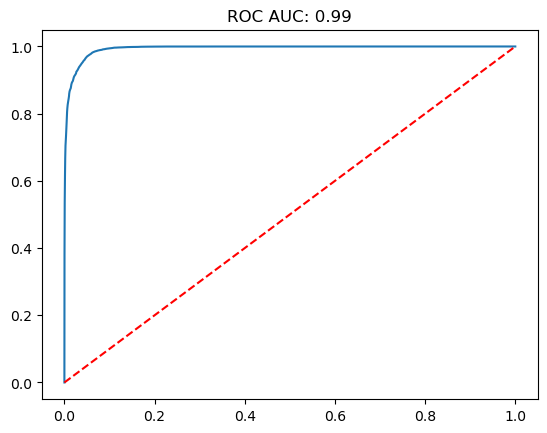

In [133]:
# Calculate the ROC curve

fpr,tpr,thres = roc_curve(y_test,pred_s)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls='--',color='red')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,pred_s),2)}')
plt.show()

In [134]:
# Predict on the training set
y_train_pred = model.predict(x_train)

# Evaluate on training set
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


[[44897     0]
 [    0 58697]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44897
           1       1.00      1.00      1.00     58697

    accuracy                           1.00    103594
   macro avg       1.00      1.00      1.00    103594
weighted avg       1.00      1.00      1.00    103594



## Gradient Boosting ⬆️

In [136]:
# Build the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10432   933]
 [  598 13930]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     11365
           1       0.94      0.96      0.95     14528

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893



In [137]:
# Predict probabilities

pred_h = model.predict(x_test)
pred_s = model.predict_proba(x_test)[:,1]

In [138]:
# Calculate ROC AUC Score

roc_auc = roc_auc_score(y_test, pred_s)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9876796037228837


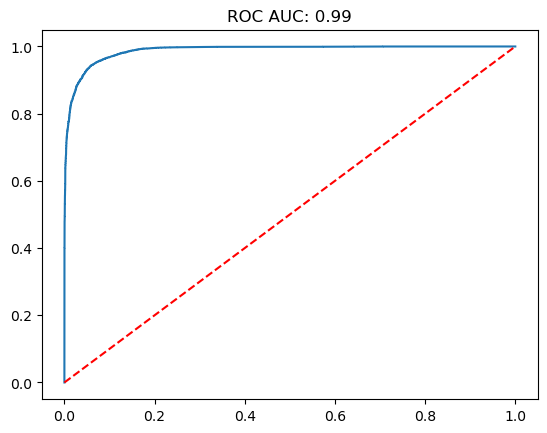

In [139]:
# Calculate the ROC curve

fpr,tpr,thres = roc_curve(y_test,pred_s)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls='--',color='red')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,pred_s),2)}')
plt.show()

In [140]:
# Predict on the training set
y_train_pred = model.predict(x_train)

# Evaluate on training set
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[41193  3704]
 [ 2314 56383]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     44897
           1       0.94      0.96      0.95     58697

    accuracy                           0.94    103594
   macro avg       0.94      0.94      0.94    103594
weighted avg       0.94      0.94      0.94    103594



## XG Boost ⚡

In [142]:
# Build the XGBoost model
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10754   611]
 [  316 14212]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11365
           1       0.96      0.98      0.97     14528

    accuracy                           0.96     25893
   macro avg       0.97      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



In [143]:
# Predict probabilities

pred_h = model.predict(x_test)
pred_s = model.predict_proba(x_test)[:,1]

In [144]:
# Calculate ROC AUC Score

roc_auc = roc_auc_score(y_test, pred_s)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9952053991406494


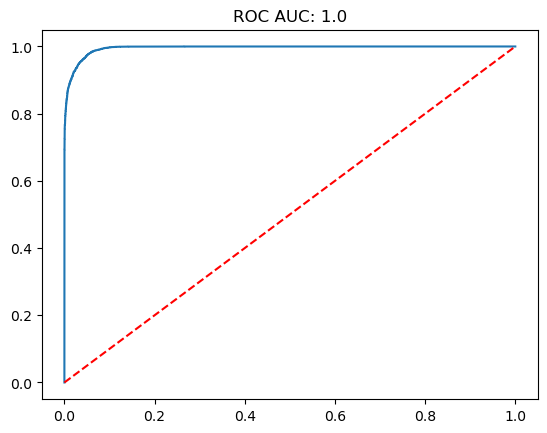

In [145]:
# Calculate the ROC curve

fpr,tpr,thres = roc_curve(y_test,pred_s)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls='--',color='red')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,pred_s),2)}')
plt.show()

In [146]:
# Predict on the training set
y_train_pred = model.predict(x_train)

# Evaluate on training set
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[43109  1788]
 [  735 57962]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     44897
           1       0.97      0.99      0.98     58697

    accuracy                           0.98    103594
   macro avg       0.98      0.97      0.98    103594
weighted avg       0.98      0.98      0.98    103594



# Model Tuning (Hyperparameter Tuning) ⚙️🔧

### XG BOOST

In [149]:
# XG BOOST Hyperparameter Tuning

model = xgb.XGBClassifier()

param_grid = {'n_estimators': [100, 200, 300],'max_depth': [3, 5, 7],'learning_rate': [0.01, 0.1, 0.2],'gamma': [0, 0.1, 0.2]}

In [150]:
# Initialize GridSearchCV for Hyperparameter tuning with ROC AUC scoring

grid_search = GridSearchCV(estimator=model,param_grid=param_grid,scoring='roc_auc',cv=5,verbose=1)

In [151]:
# Fit the GridSearchCV

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [152]:
# Best parameters and best score

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best Score: 0.9951510485317991


In [153]:
# Get the best model

best_model = grid_search.best_estimator_  

In [154]:
# Evaluate on the Training set

y_train_pred = best_model.predict(x_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[43477  1420]
 [  510 58187]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     44897
           1       0.98      0.99      0.98     58697

    accuracy                           0.98    103594
   macro avg       0.98      0.98      0.98    103594
weighted avg       0.98      0.98      0.98    103594



In [155]:
# Evaluate on the Test set

y_test_pred = best_model.predict(x_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[10741   624]
 [  299 14229]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11365
           1       0.96      0.98      0.97     14528

    accuracy                           0.96     25893
   macro avg       0.97      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



#### **Model Validation**

In [157]:
# XG Boost (Perform cross-validation)

cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='roc_auc')

# Print cross-validation scores

print("Cross-Validation ROC AUC scores:", cv_scores)
print("Mean ROC AUC:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", np.std(cv_scores))

Cross-Validation ROC AUC scores: [0.99486482 0.99522178 0.99507302 0.9953075  0.99528812]
Mean ROC AUC: 0.9951510485317991
Standard deviation of cross-validation scores: 0.00016509705952504902


---

### Gradient Boosting

In [160]:
# Gradient Boosting Hyperparameter Tuning

model = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
   }

In [161]:
# Initialize GridSearchCV for Hyperparameter tuning with ROC AUC scoring

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='roc_auc', cv = 3, verbose = 1)

In [162]:
# Fit the GridSearchCV

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [163]:
# Best parameters and best score

print("Best parameters : ", grid_search.best_params_)
print("Best ROC AUC score: ", grid_search.best_score_)

Best parameters :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best ROC AUC score:  0.9943942648548973


In [164]:
# Get the best model

best_model = grid_search.best_estimator_  

In [165]:
# Evaluate on the Training set

y_train_pred = best_model.predict(x_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[42472  2425]
 [ 1070 57627]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     44897
           1       0.96      0.98      0.97     58697

    accuracy                           0.97    103594
   macro avg       0.97      0.96      0.97    103594
weighted avg       0.97      0.97      0.97    103594



In [166]:
# Evaluate on the Test set

y_test_pred = best_model.predict(x_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[10720   645]
 [  332 14196]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     11365
           1       0.96      0.98      0.97     14528

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



#### **Model Validation**

In [168]:
# Gradient Boosting (Perform cross-validation)

cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='roc_auc')

# Print cross-validation scores

print("Cross-Validation ROC AUC scores:", cv_scores)
print("Mean ROC AUC:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", np.std(cv_scores))

Cross-Validation ROC AUC scores: [0.99397859 0.99439487 0.99440566 0.99462839 0.9946495 ]
Mean ROC AUC: 0.9944114010181526
Standard deviation of cross-validation scores: 0.00024141560143010462


---

<div style="background-color: #ffff99; padding: 10px;">

# Conclusions After Fitting All the Models:

## Logistic Regression:
- The Logistic model shows a significant difference between the training and test scores.
- This suggests overfitting, and the scores are not satisfactory.

## Random Forest & Decision Tree:
- Both models are giving 100% scores on the training data, which indicates overfitting.
- Therefore, they are not suitable choices.

## Gradient Boosting & XGBoost:
- Both models seem to be good fits.
- There is a minimal difference between the training and test scores, showing good generalization.

### To decide between XGBoost and Gradient Boosting, k-fold Cross-Validation was performed:

## Cross-Validation Results:

### XGBoost:
- Cross-validation scores: `[0.99486482, 0.99522178, 0.99507302, 0.9953075, 0.99528812]`
- Mean ROC AUC: **0.9951510485317991**
- Standard deviation: **0.00016509705952504902**

### Gradient Boosting:
- Cross-validation scores: `[0.99397727, 0.9943969, 0.99440051, 0.99463408, 0.99464865]`
- Mean ROC AUC: **0.994411482584446**
- Standard deviation: **0.0002427650552607672**

## Comparison:

### Performance:
- XGBoost has a higher mean cross-validation score (**0.9951**) compared to Gradient Boosting (**0.9944**).
- This indicates that XGBoost performs better on average.

### Stability:
- XGBoost has a lower standard deviation (**0.000165**) compared to Gradient Boosting (**0.000242**).
- This suggests that XGBoost is more stable across different cross-validation folds, indicating consistent performance.

### Overfitting:
- Both XGBoost and Gradient Boosting show good generalization, with minimal differences between training and test scores.
- However, XGBoost has a slight edge due to its regularization capabilities, which help manage overfitting.

### Model Complexity:
- XGBoost incorporates advanced features like regularization and tree pruning, making it a more robust choice for managing overfitting.

## Conclusion:
Given the comparison and cross-validation results:

**XGBoost is the better final model** for selection due to:
- Higher accuracy and stability in cross-validation results.
- Better generalization capabilities across training and test sets.
- Stronger performance metrics (ROC AUC score).
- More consistent performance with a lower standard deviation.


## Final Model Validation ✅

In [172]:
# Set the final model as XGBoost with the best parameters

final_model = xgb.XGBClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    learning_rate=grid_search.best_params_['learning_rate'])

In [173]:
# Fit the final model

final_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [174]:
# Evaluate the final model

y_train_pred = final_model.predict(x_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[42321  2576]
 [  997 57700]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     44897
           1       0.96      0.98      0.97     58697

    accuracy                           0.97    103594
   macro avg       0.97      0.96      0.96    103594
weighted avg       0.97      0.97      0.97    103594



<div style="background-color: #ffff99; padding: 10px;">

### Model Evaluation Summary

The final model was evaluated using the training data, resulting in the following metrics:

#### Confusion Matrix:
- **True Negatives (0):** 42,321
- **False Positives (1):** 2,576
- **False Negatives (0):** 997
- **True Positives (1):** 57,700

#### Classification Report:
- **Precision:**
  - Class 0: 0.98
  - Class 1: 0.96
- **Recall:**
  - Class 0: 0.94
  - Class 1: 0.98
- **F1-Score:**
  - Class 0: 0.96
  - Class 1: 0.97
- **Overall Accuracy:** 0.97

### Analysis
1. **High Accuracy:** The model achieved an overall accuracy of 97%, indicating strong performance in predicting both classes.

2. **Precision and Recall:**
   - The precision for Class 0 (negative class) is 0.98, meaning that 98% of instances predicted as Class 0 are correct.
   - The recall for Class 1 (positive class) is 0.98, indicating that the model successfully identifies 98% of actual positive instances.

3. **Balanced Performance:** The F1-scores of 0.96 for Class 0 and 0.97 for Class 1 suggest that the model maintains a good balance between precision and recall, which is essential in scenarios where false positives and false negatives have different implications.

4. **Misclassification Analysis:** The model misclassified 2,576 instances of Class 0 as Class 1 (false positives) and 997 instances of Class 1 as Class 0 (false negatives).

### Conclusion
Overall, the final model demonstrates excellent predictive capabilities, with high precision, recall, and accuracy. 

# Business Interpretations 💡

In [177]:
importance = final_model.feature_importances_
importance

array([0.0071627 , 0.00513633, 0.07978337, 0.00869779, 0.0048333 ,
       0.0200146 , 0.00229781, 0.3892594 , 0.0282885 , 0.036545  ,
       0.03480885, 0.0299102 , 0.02395179, 0.04214053, 0.0212863 ,
       0.02191341, 0.00195957, 0.00957518, 0.00139898, 0.05404717,
       0.12465248, 0.04046384, 0.01187286], dtype=float32)

In [178]:
importance_data = pd.DataFrame({"Feature Importance" :importance},index = x_train.columns).sort_values("Feature Importance", ascending = False)
importance_data

Feature Importance
Online boarding                              0.389259
Type of Travel_Personal Travel               0.124652
Inflight wifi service                        0.079783
Customer Type_disloyal Customer              0.054047
Checkin service                              0.042141
Class_Eco                                    0.040464
Inflight entertainment                       0.036545
On-board service                             0.034809
Leg room service                             0.029910
Seat comfort                                 0.028288
Baggage handling                             0.023952
Cleanliness                                  0.021913
Inflight service                             0.021286
Gate location                                0.020015
Class_Eco Plus                               0.011873
Arrival Delay in Minutes                     0.009575
Departure/Arrival time convenient            0.008698
Age                                          0.007163
Flight Distance                              0.005136
Ease of Online booking                       0.004833
Food and drink                               0.002298
Departure Delay in Minutes                   0.001960
Gender_Male                                  0.001399

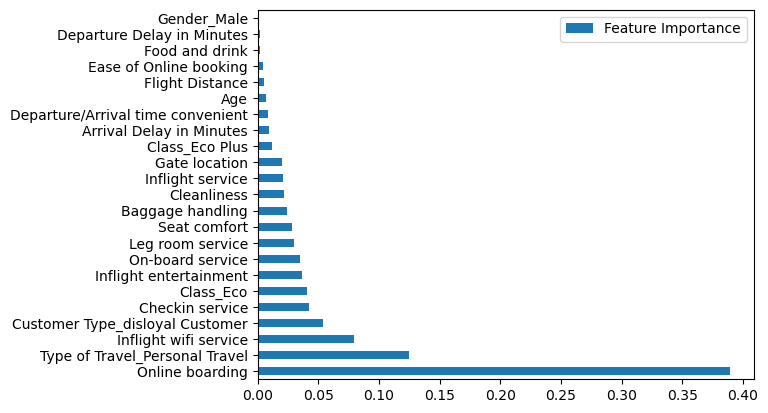

In [179]:
importance_data.plot(kind = "barh")
plt.show()


<div style="background-color: #ccf2ff; padding: 10px;">
    <h3>Business Interpretation from the Model</h3>
    <img src="IMAGE2.webp" alt="Flight Image" style="display: block; margin: 0 auto; width: 800px; height: 500px;;">

The feature importance analysis from the final model provides valuable insights into the factors influencing Passenger Satisfaction:

1. **Online Boarding:** With a significant importance score of 0.39, online boarding is the most critical factor affecting Passenger Satisfaction. This suggests that improving the online boarding experience could greatly enhance overall Customer Satisfaction.

2. **Type of Travel:** The distinction between personal travel (0.12) indicates that the nature of the trip influences satisfaction levels. Tailoring services for personal travelers may improve their experience.

3. **Inflight Wifi Service:** This feature (0.08) highlights the importance of connectivity during flights. Enhancing wifi services could be a key area for improvement, particularly for tech-savvy passengers.

4. **Customer Type:** The impact of disloyal customers (0.05) suggests that addressing the needs of these travelers could help in retaining them. Targeted loyalty programs might be beneficial.

5. **Service Features:** Other important factors include check-in service (0.04) and inflight entertainment (0.04), highlighting how customer service and entertainment options contribute to passenger satisfaction.
   
### Conclusion
Focusing on these high-impact areas, especially online boarding and service quality, could drive improvements in customer satisfaction and retention, ultimately enhancing the airline's Passengers Satisfaction.

</div>

# Save The Final Model 📦

In [182]:
# Save the final model as a pickle file

In [183]:
with open ("final_model_xgb.pkl","wb") as file:
    pickle.dump(final_model,file)